In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import OneSidedSelection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer


In [ ]:
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
df

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,145455,6/21/2017,Station 41,2.8,23.4,0.0,NaN,NaN,E,31.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,145456,6/22/2017,Station 41,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,145457,6/23/2017,Station 41,5.4,26.9,0.0,NaN,NaN,N,37.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,145458,6/24/2017,Station 41,7.8,27.0,0.0,NaN,NaN,SE,28.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.shape

(145460, 24)

In [ ]:
df.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df=df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          145460 non-null  object 
 1   Weather Station               145460 non-null  object 
 2   Minimum Temperature           143975 non-null  float64
 3   Maximum Temperature           144199 non-null  float64
 4   Rainfall                      142199 non-null  float64
 5   Evaporation                   82670 non-null   float64
 6   Sunshine                      75625 non-null   float64
 7   Gust Trajectory               135134 non-null  object 
 8   Air Velocity                  135197 non-null  float64
 9   Gust Trajectory at  9 AM      134894 non-null  object 
 10  Gust Trajectory at  3 PM      141232 non-null  object 
 11  Air Velocity at  9 AM         143693 non-null  float64
 12  Air Velocity at  3 PM         142398 non-nul

In [ ]:
df.isnull().sum().sum()

343248

In [ ]:
df.duplicated().sum()

0

In [ ]:
for c in list(df):
  print(c,': ',round((df[c].isnull().sum()/len(df))*100,2),'%')

Date :  0.0 %
Weather Station :  0.0 %
Minimum Temperature :  1.02 %
Maximum Temperature :  0.87 %
Rainfall :  2.24 %
Evaporation :  43.17 %
Sunshine :  48.01 %
Gust Trajectory :  7.1 %
Air Velocity :  7.06 %
Gust Trajectory at  9 AM :  7.26 %
Gust Trajectory at  3 PM :  2.91 %
Air Velocity at  9 AM :  1.21 %
Air Velocity at  3 PM :  2.11 %
Moisture Level at 9 AM :  1.82 %
Moisture Level at 3 PM :  3.1 %
Atmospheric Pressure at 9 AM :  10.36 %
Atmospheric Pressure at 3 PM :  10.33 %
Cloudiness at 9 AM :  38.42 %
Cloudiness at 3 PM :  40.81 %
Recorded Temperature at 9 AM :  1.21 %
Recorded Temperature at 3 PM :  2.48 %
Rain that day :  2.24 %
Rain the day after :  2.25 %


In [ ]:
for c in list(df):
  print(df[c].value_counts())

Date
11/12/2013    49
9/1/2014      49
8/23/2014     49
8/24/2014     49
8/25/2014     49
              ..
11/29/2007     1
11/28/2007     1
11/27/2007     1
11/26/2007     1
1/31/2008      1
Name: count, Length: 3436, dtype: int64
Weather Station
Station 9     3436
Station 37    3344
Station 13    3193
Station 18    3193
Station 7     3193
Station 0     3193
Station 31    3193
Station 15    3193
Station 1     3040
Station 22    3040
Station 5     3040
Station 39    3040
Station 14    3040
Station 8     3040
Station 17    3040
Station 3     3040
Station 6     3040
Station 2     3040
Station 23    3040
Station 47    3040
Station 24    3039
Station 40    3039
Station 30    3039
Station 48    3009
Station 28    3009
Station 10    3009
Station 11    3009
Station 21    3009
Station 35    3009
Station 32    3009
Station 29    3009
Station 46    3009
Station 4     3009
Station 20    3009
Station 27    3009
Station 19    3009
Station 34    3009
Station 38    3009
Station 42    3009
Station 45 

In [ ]:
df["datetime"] = pd.to_datetime(df["Date"])
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["Year"] = df["datetime"].dt.year
df = df.sort_values(by='datetime')

In [ ]:
df = df.drop("Date", axis=1)

df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["Year"] = df["datetime"].dt.year

In [ ]:
df['Rain that day'] = df['Rain that day'].fillna(df['Rainfall'].apply(lambda x: 'No' if x == 0 else 'Yes'))

In [ ]:
df['Rain the day after'].value_counts()

Rain the day after
No     112793
Yes     32667
Name: count, dtype: int64

<Axes: xlabel='Rain the day after', ylabel='count'>

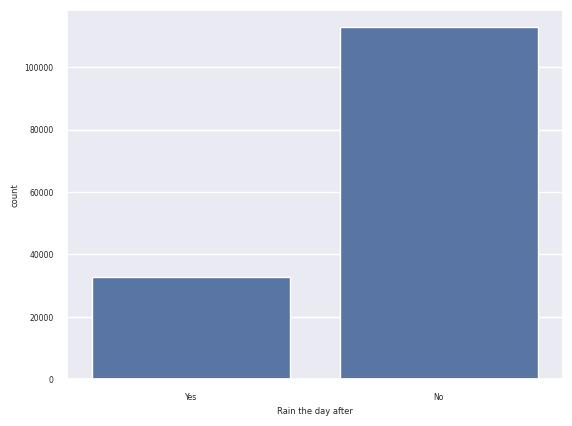

In [ ]:
sns.countplot(df, x="Rain the day after")

In [ ]:
for c in list(df):
  print(c,': ',round((df[c].isnull().sum()/len(df))*100,2),'%')

Weather Station :  0.0 %
Minimum Temperature :  1.02 %
Maximum Temperature :  0.87 %
Rainfall :  2.24 %
Evaporation :  43.17 %
Sunshine :  48.01 %
Gust Trajectory :  7.1 %
Air Velocity :  7.06 %
Gust Trajectory at  9 AM :  7.26 %
Gust Trajectory at  3 PM :  2.91 %
Air Velocity at  9 AM :  1.21 %
Air Velocity at  3 PM :  2.11 %
Moisture Level at 9 AM :  1.82 %
Moisture Level at 3 PM :  3.1 %
Atmospheric Pressure at 9 AM :  10.36 %
Atmospheric Pressure at 3 PM :  10.33 %
Cloudiness at 9 AM :  38.42 %
Cloudiness at 3 PM :  40.81 %
Recorded Temperature at 9 AM :  1.21 %
Recorded Temperature at 3 PM :  2.48 %
Rain that day :  0.0 %
Rain the day after :  0.0 %
datetime :  0.0 %
day :  0.0 %
month :  0.0 %
Year :  0.0 %


In [ ]:
#def sampler(df, minor_by_total_ratio):
 # df = df.sample(frac=1, random_state=42)
 # rainy_df = df.loc[df['Rain the day after'] == "Yes"]
 # non_rainy_df = df.loc[df['Rain the day after'] == "No"][:int(32668 * 1.5)]
 # normal_distributed_df = pd.concat([rainy_df, non_rainy_df])
 # new_df = normal_distributed_df.sample(frac=1, random_state=42)
 # new_df


In [ ]:
  df = df.sample(frac=1, random_state=42)
  rainy_df = df.loc[df['Rain the day after'] == "Yes"]
  non_rainy_df = df.loc[df['Rain the day after'] == "No"][:int(32668 * 2)]
  normal_distributed_df = pd.concat([rainy_df, non_rainy_df])
  new_df = normal_distributed_df.sample(frac=1, random_state=42)
  new_df

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,datetime,day,month,Year
31104,Station 37,7.6,17.6,0.0,4.4,10.4,NaN,NaN,W,E,...,1.0,3.0,10.8,15.9,No,No,2010-08-17,17,8,2010
30866,Station 37,19.7,29.4,0.0,9.0,12.0,NaN,NaN,SSW,ENE,...,3.0,5.0,24.6,27.1,No,No,2009-12-22,22,12,2009
52712,Station 23,-1.3,8.2,NaN,NaN,NaN,W,44.0,NaN,NW,...,NaN,NaN,NaN,7.5,Yes,Yes,2010-09-12,12,9,2010
144281,Station 41,16.0,28.7,0.0,NaN,NaN,ENE,35.0,ESE,E,...,NaN,NaN,16.8,27.0,No,No,2014-04-04,4,4,2014
110403,Station 1,16.3,23.8,0.0,6.2,11.1,NaN,NaN,N,E,...,7.0,0.0,19.8,21.9,No,No,2014-03-06,6,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21986,Station 27,16.1,21.1,36.8,3.8,6.1,WNW,70.0,NW,NW,...,1.0,2.0,19.6,19.9,Yes,Yes,2011-06-17,17,6,2011
48525,Station 9,15.6,32.6,0.0,NaN,NaN,W,59.0,N,W,...,NaN,NaN,25.6,32.1,No,No,2016-02-14,14,2,2016
53397,Station 23,-2.8,5.9,1.2,NaN,NaN,W,31.0,NW,WNW,...,NaN,NaN,1.0,5.5,Yes,No,2012-08-27,27,8,2012
33879,Station 38,17.6,20.3,7.8,2.8,0.0,S,54.0,SSW,SSW,...,8.0,8.0,17.9,18.6,Yes,Yes,2009-12-26,26,12,2009


In [ ]:
colors = ["#DF0101", "#0101DF"]

<ipython-input-1209-8ff27119f41e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(new_df, x="Rain the day after", palette=colors)


<Axes: xlabel='Rain the day after', ylabel='count'>

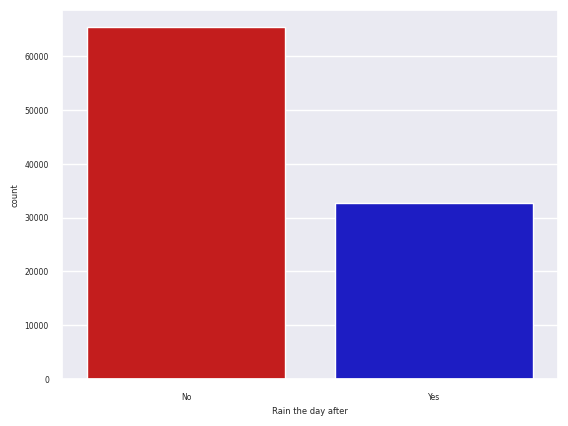

In [ ]:
sns.countplot(new_df, x="Rain the day after", palette=colors)

In [ ]:
for c in list(new_df):
  print(c,': ',round((new_df[c].isnull().sum()/len(new_df))*100,2),'%')

Weather Station :  0.0 %
Minimum Temperature :  1.01 %
Maximum Temperature :  0.86 %
Rainfall :  2.38 %
Evaporation :  43.33 %
Sunshine :  47.95 %
Gust Trajectory :  7.21 %
Air Velocity :  7.17 %
Gust Trajectory at  9 AM :  7.08 %
Gust Trajectory at  3 PM :  3.0 %
Air Velocity at  9 AM :  1.19 %
Air Velocity at  3 PM :  2.14 %
Moisture Level at 9 AM :  1.84 %
Moisture Level at 3 PM :  3.17 %
Atmospheric Pressure at 9 AM :  10.26 %
Atmospheric Pressure at 3 PM :  10.24 %
Cloudiness at 9 AM :  38.1 %
Cloudiness at 3 PM :  40.26 %
Recorded Temperature at 9 AM :  1.22 %
Recorded Temperature at 3 PM :  2.54 %
Rain that day :  0.0 %
Rain the day after :  0.0 %
datetime :  0.0 %
day :  0.0 %
month :  0.0 %
Year :  0.0 %


In [ ]:
X = new_df.drop("Rain the day after", axis=1)
y= new_df["Rain the day after"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
for c in list(new_df):
  print(c,': ',round((df_train[c].isnull().sum()/len(new_df))*100,2),'%')

Weather Station :  0.0 %
Minimum Temperature :  0.83 %
Maximum Temperature :  0.69 %
Rainfall :  1.93 %
Evaporation :  34.63 %
Sunshine :  38.32 %
Gust Trajectory :  5.76 %
Air Velocity :  5.72 %
Gust Trajectory at  9 AM :  5.65 %
Gust Trajectory at  3 PM :  2.38 %
Air Velocity at  9 AM :  0.96 %
Air Velocity at  3 PM :  1.68 %
Moisture Level at 9 AM :  1.49 %
Moisture Level at 3 PM :  2.5 %
Atmospheric Pressure at 9 AM :  8.2 %
Atmospheric Pressure at 3 PM :  8.19 %
Cloudiness at 9 AM :  30.43 %
Cloudiness at 3 PM :  32.15 %
Recorded Temperature at 9 AM :  1.0 %
Recorded Temperature at 3 PM :  2.0 %
Rain that day :  0.0 %
Rain the day after :  0.0 %
datetime :  0.0 %
day :  0.0 %
month :  0.0 %
Year :  0.0 %


In [ ]:
df_train = df_train.sort_values(by='datetime')

In [ ]:
df_train = df_train.set_index(['Weather Station','day','month'])

# Preprocess

## Train preprocess

### 3.1 filling air temperature

<Axes: xlabel='Recorded Temperature at 3 PM', ylabel='Count'>

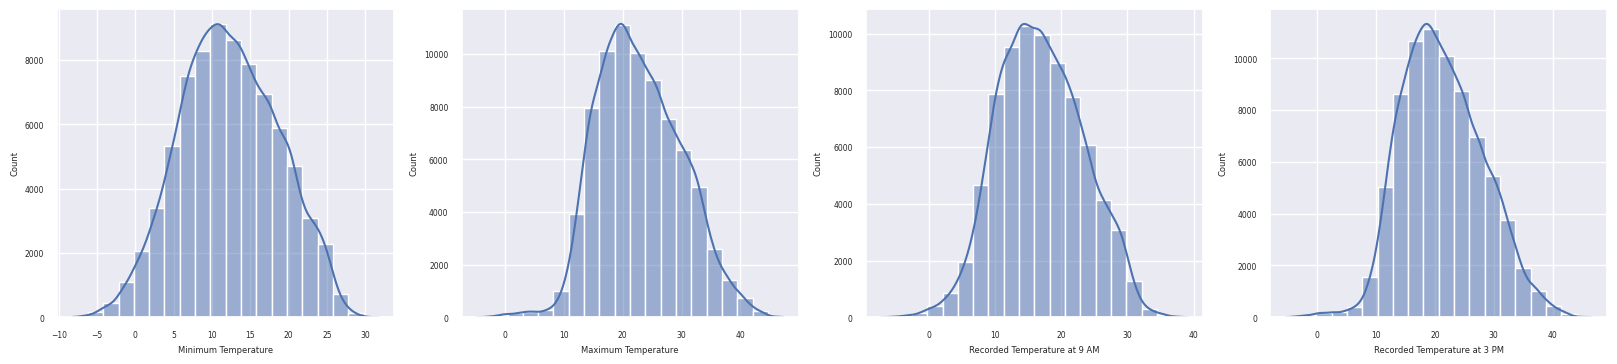

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

In [ ]:
min_temp_mean = df_train.groupby(['Weather Station','day','month'])['Minimum Temperature'].mean()
max_temp_mean = df_train.groupby(['Weather Station','day','month'])['Maximum Temperature'].mean()
recorded_temp_at_9_am = df_train.groupby(['Weather Station','day','month'])['Recorded Temperature at 9 AM'].mean()
recorded_temp_at_3_pm = df_train.groupby(['Weather Station','day','month'])['Recorded Temperature at 3 PM'].mean()
df_train.update(pd.DataFrame(min_temp_mean,columns=["Minimum Temperature"]),overwrite=False)
df_train.update(pd.DataFrame(max_temp_mean,columns=["Maximum Temperature"]),overwrite=False)
df_train.update(pd.DataFrame(recorded_temp_at_9_am,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_train.update(pd.DataFrame(recorded_temp_at_3_pm,columns=["Recorded Temperature at 3 PM"]),overwrite=False)

In [ ]:
df_train[['Recorded Temperature at 3 PM']] = df_train[['Recorded Temperature at 3 PM']].fillna(method='bfill')
df_train[['Recorded Temperature at 9 AM']] = df_train[['Recorded Temperature at 9 AM']].fillna(method='bfill')
df_train[['Maximum Temperature']] = df_train[['Maximum Temperature']].fillna(method='bfill')
df_train[['Minimum Temperature']] = df_train[['Minimum Temperature']].fillna(method='bfill')
df_train[['Recorded Temperature at 3 PM']] = df_train[['Recorded Temperature at 3 PM']].fillna(method='ffill')
df_train[['Recorded Temperature at 9 AM']] = df_train[['Recorded Temperature at 9 AM']].fillna(method='ffill')
df_train[['Maximum Temperature']] = df_train[['Maximum Temperature']].fillna(method='ffill')
df_train[['Minimum Temperature']] = df_train[['Minimum Temperature']].fillna(method='ffill')


In [ ]:
df_train[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum()


Minimum Temperature             0
Maximum Temperature             0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
dtype: int64

<Axes: xlabel='Moisture Level at 3 PM', ylabel='Count'>

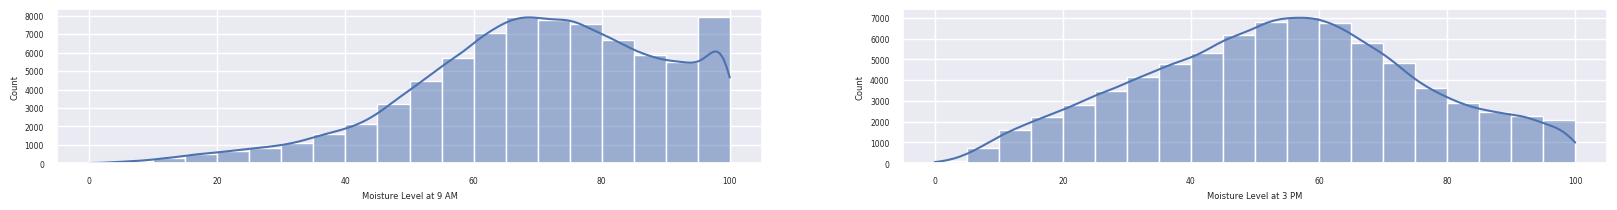

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train["Moisture Level at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train["Moisture Level at 3 PM"], bins=20, kde=True,ax=axes[1])

In [ ]:
df_train[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum()

Moisture Level at 9 AM    1460
Moisture Level at 3 PM    2450
dtype: int64

In [ ]:
# Moisture Level at 3pm
moisture_level_train_filler_3pm = df_train.groupby(['Weather Station','day','month'])['Moisture Level at 3 PM'].median()
moisture_level_train_filler_3pm = pd.DataFrame(moisture_level_train_filler_3pm.fillna(method='ffill'),columns=["Moisture Level at 3 PM"])
moisture_level_train_filler_3pm = pd.DataFrame(moisture_level_train_filler_3pm.fillna(method='bfill'),columns=["Moisture Level at 3 PM"])
df_train.update(moisture_level_train_filler_3pm,overwrite=False)
# Moisture Level at 9am
moisture_level_train_filler_9am = df_train.groupby(['Weather Station','day','month'])['Moisture Level at 9 AM'].median()
moisture_level_train_filler_9am = pd.DataFrame(moisture_level_train_filler_9am.fillna(method='ffill'),columns=["Moisture Level at 9 AM"])
moisture_level_train_filler_9am = pd.DataFrame(moisture_level_train_filler_9am.fillna(method='bfill'),columns=["Moisture Level at 9 AM"])
df_train.update(moisture_level_train_filler_9am,overwrite=False)

In [ ]:
df_train[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum()

Moisture Level at 9 AM    0
Moisture Level at 3 PM    0
dtype: int64

<Axes: xlabel='Rainfall', ylabel='Count'>

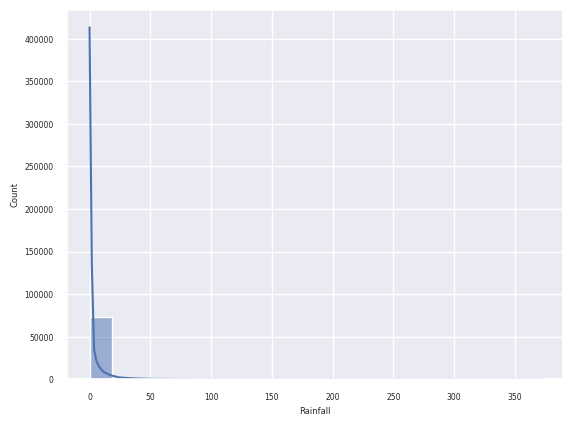

In [ ]:
sns.histplot(df_train["Rainfall"], bins=20, kde=True)

In [ ]:
from sklearn.impute import KNNImputer
rainfall_imputer = KNNImputer(n_neighbors=5)
rainfall_imputer.fit_transform(df_train[["Rainfall"]])
df_train["Rainfall"] = rainfall_imputer.fit_transform(df_train[["Rainfall"]])

In [ ]:
df_train["Rainfall"].isnull().sum()

0

<Axes: xlabel='Air Velocity at  3 PM', ylabel='Count'>

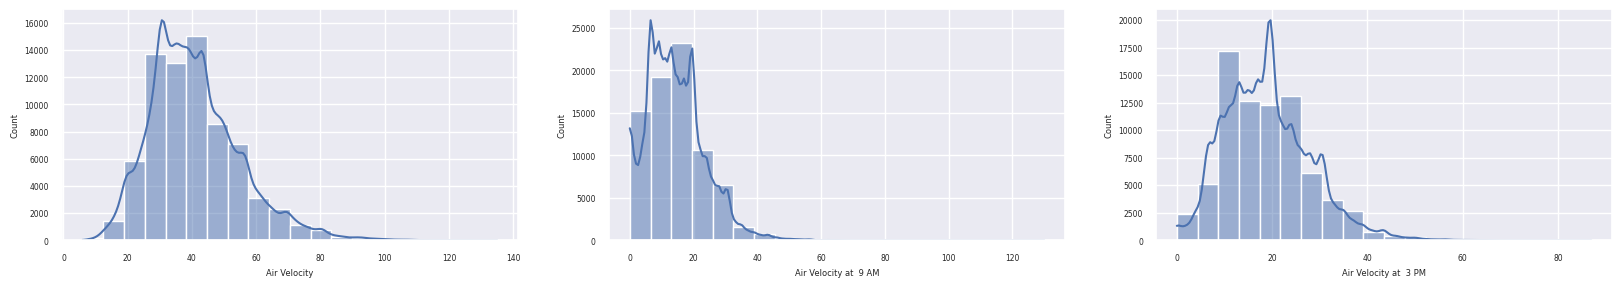

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_train["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_train["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])


In [ ]:
# Air Velocity
air_velocity_filler = df_train.groupby(['Weather Station','day','month'])['Air Velocity'].median()
air_velocity_filler = pd.DataFrame(air_velocity_filler.fillna(method='ffill'),columns=["Air Velocity"])
air_velocity_filler = pd.DataFrame(air_velocity_filler.fillna(method='bfill'),columns=["Air Velocity"])
df_train.update(air_velocity_filler,overwrite=False)
# Air Velocity at 3pm
air_velocity_filler_3pm = df_train.groupby(['Weather Station','day','month'])['Air Velocity at  3 PM'].median()
air_velocity_filler_3pm = pd.DataFrame(air_velocity_filler_3pm.fillna(method='ffill'),columns=["Air Velocity at  3 PM"])
air_velocity_filler_3pm = pd.DataFrame(air_velocity_filler_3pm.fillna(method='bfill'),columns=["Air Velocity at  3 PM"])
df_train.update(air_velocity_filler_3pm,overwrite=False)
# Air Velocity at 9am
air_velocity_filler_9am = df_train.groupby(['Weather Station','day','month'])['Air Velocity at  9 AM'].median()
air_velocity_filler_9am = pd.DataFrame(air_velocity_filler_9am.fillna(method='ffill'),columns=["Air Velocity at  9 AM"])
air_velocity_filler_9am = pd.DataFrame(air_velocity_filler_9am.fillna(method='bfill'),columns=["Air Velocity at  9 AM"])
df_train.update(air_velocity_filler_9am,overwrite=False)

In [ ]:
df_train[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum()

Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             0
dtype: int64

<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

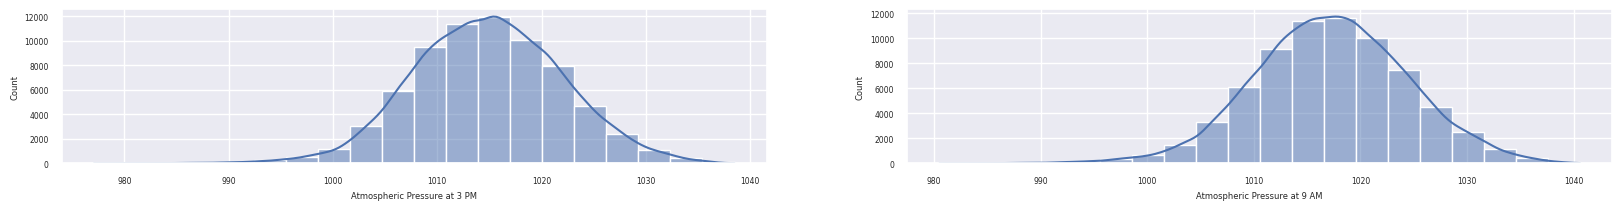

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])


In [ ]:
# Atmospheric Pressure at 3pm
atmospheric_pressure_filler_3pm = df_train.groupby(['Weather Station','day','month'])['Atmospheric Pressure at 3 PM'].median()
atmospheric_pressure_filler_3pm = pd.DataFrame(atmospheric_pressure_filler_3pm.fillna(method='ffill'),columns=["Atmospheric Pressure at 3 PM"])
atmospheric_pressure_filler_3pm = pd.DataFrame(atmospheric_pressure_filler_3pm.fillna(method='bfill'),columns=["Atmospheric Pressure at 3 PM"])
df_train.update(atmospheric_pressure_filler_3pm,overwrite=False)
# Atmospheric Pressure at 9am
atmospheric_pressure_filler_9am = df_train.groupby(['Weather Station','day','month'])['Atmospheric Pressure at 9 AM'].median()
atmospheric_pressure_filler_9am = pd.DataFrame(atmospheric_pressure_filler_9am.fillna(method='ffill'),columns=["Atmospheric Pressure at 9 AM"])
atmospheric_pressure_filler_9am = pd.DataFrame(atmospheric_pressure_filler_9am.fillna(method='bfill'),columns=["Atmospheric Pressure at 9 AM"])
df_train.update(atmospheric_pressure_filler_9am,overwrite=False)


#atm_pres_9am_imputer = KNNImputer(n_neighbors=3)
#atm_pres_3pm_imputer = KNNImputer(n_neighbors=3)
#df_train["Atmospheric Pressure at 9 AM"]= atm_pres_9am_imputer.fit_transform(df_train[["Atmospheric Pressure at 9 AM"]])
#df_train["Atmospheric Pressure at 3 PM"]= atm_pres_3pm_imputer.fit_transform(df_train[["Atmospheric Pressure at 3 PM"]])




<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

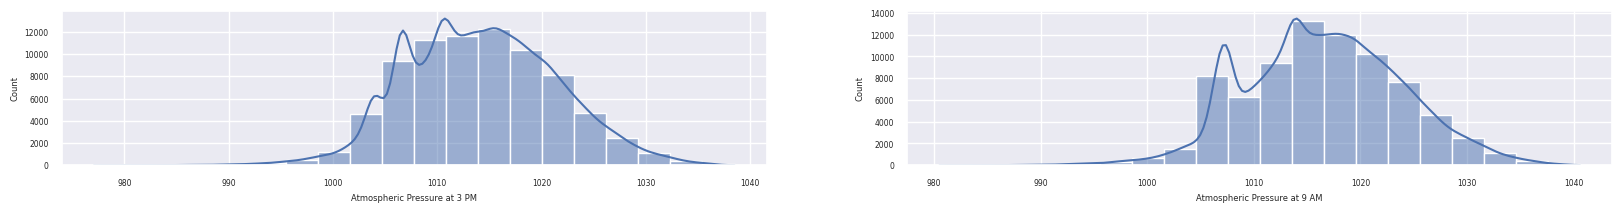

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_train["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_train["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

In [ ]:
df_train[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum()

Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
dtype: int64

In [ ]:
gust_trajectory_filler = df_train['Gust Trajectory'].fillna(df_train['Gust Trajectory'].mode()[0])
gust_trajectory_filler = pd.DataFrame(gust_trajectory_filler.fillna(method='ffill'),columns=["Gust Trajectory"])
gust_trajectory_filler = pd.DataFrame(gust_trajectory_filler.fillna(method='bfill'),columns=["Gust Trajectory"])
df_train.update(gust_trajectory_filler,overwrite=False)
gust_trajectory_at_3pm_filler = df_train['Gust Trajectory at  3 PM'].fillna(df_train['Gust Trajectory at  3 PM'].mode()[0])
gust_trajectory_at_3pm_filler = pd.DataFrame(gust_trajectory_at_3pm_filler.fillna(method='ffill'),columns=["Gust Trajectory at  3 PM"])
gust_trajectory_at_3pm_filler = pd.DataFrame(gust_trajectory_at_3pm_filler.fillna(method='bfill'),columns=["Gust Trajectory at  3 PM"])
df_train.update(gust_trajectory_at_3pm_filler,overwrite=False)
gust_trajectory_at_9am_filler = df_train['Gust Trajectory at  9 AM'].fillna(df_train['Gust Trajectory at  9 AM'].mode()[0])
gust_trajectory_at_9am_filler = pd.DataFrame(gust_trajectory_at_9am_filler.fillna(method='ffill'),columns=["Gust Trajectory at  9 AM"])
gust_trajectory_at_9am_filler = pd.DataFrame(gust_trajectory_at_9am_filler.fillna(method='bfill'),columns=["Gust Trajectory at  9 AM"])
df_train.update(gust_trajectory_at_9am_filler,overwrite=False)


In [ ]:
df_train[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum()


Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64

<Axes: xlabel='Evaporation', ylabel='Count'>

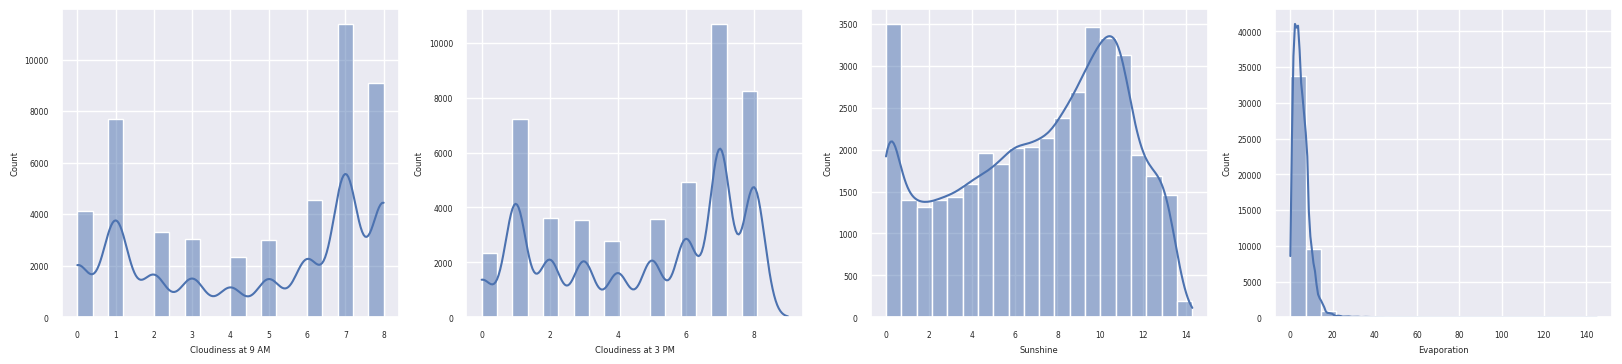

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train["Evaporation"], bins=20, kde=True,ax=axes[3])

In [ ]:

cloudiness_at_9_am_mean = df_train.groupby(['Weather Station','day','month'])['Cloudiness at 9 AM'].median()
cloudiness_at_9_am_mean = pd.DataFrame(cloudiness_at_9_am_mean.fillna(method='ffill'),columns=["Cloudiness at 9 AM"])
cloudiness_at_9_am_mean = pd.DataFrame(cloudiness_at_9_am_mean.fillna(method='bfill'),columns=["Cloudiness at 9 AM"])
df_train.update(cloudiness_at_9_am_mean,overwrite=False)

cloudiness_at_3_pm_mean = df_train.groupby(['Weather Station','day','month'])['Cloudiness at 3 PM'].median()
cloudiness_at_3_pm_mean = pd.DataFrame(cloudiness_at_3_pm_mean.fillna(method='ffill'),columns=["Cloudiness at 3 PM"])
cloudiness_at_3_pm_mean = pd.DataFrame(cloudiness_at_3_pm_mean.fillna(method='bfill'),columns=["Cloudiness at 3 PM"])
df_train.update(cloudiness_at_3_pm_mean,overwrite=False)

sunshine_mean = df_train.groupby(['Weather Station','day','month'])['Sunshine'].mean()
sunshine_mean = pd.DataFrame(sunshine_mean.fillna(method='ffill'),columns=["Sunshine"])
sunshine_mean = pd.DataFrame(sunshine_mean.fillna(method='bfill'),columns=["Sunshine"])
df_train.update(sunshine_mean,overwrite=False)

evaporation_mean = df_train.groupby(['Weather Station','day','month'])['Evaporation'].median()
evaporation_mean = pd.DataFrame(evaporation_mean.fillna(method='ffill'),columns=["Evaporation"])
evaporation_mean = pd.DataFrame(evaporation_mean.fillna(method='bfill'),columns=["Evaporation"])
df_train.update(evaporation_mean,overwrite=False)
#cloudiness_at_9_am_imputer = KNNImputer(n_neighbors=1)
#df_train["Cloudiness at 9 AM"] = cloudiness_at_9_am_imputer.fit_transform(df_train[["Cloudiness at 9 AM"]])
#cloudiness_at_3_pm_imputer = KNNImputer(n_neighbors=1)
#df_train["Cloudiness at 3 PM"] = cloudiness_at_3_pm_imputer.fit_transform(df_train[["Cloudiness at 3 PM"]])
#sunshine_imputer = KNNImputer(n_neighbors=1)
#df_train["Sunshine"] = sunshine_imputer.fit_transform(df_train[["Sunshine"]])
#evaporation_imputer = KNNImputer(n_neighbors=1)
#df_train["Evaporation"] = evaporation_imputer.fit_transform(df_train[["Evaporation"]])

<Axes: xlabel='Evaporation', ylabel='Count'>

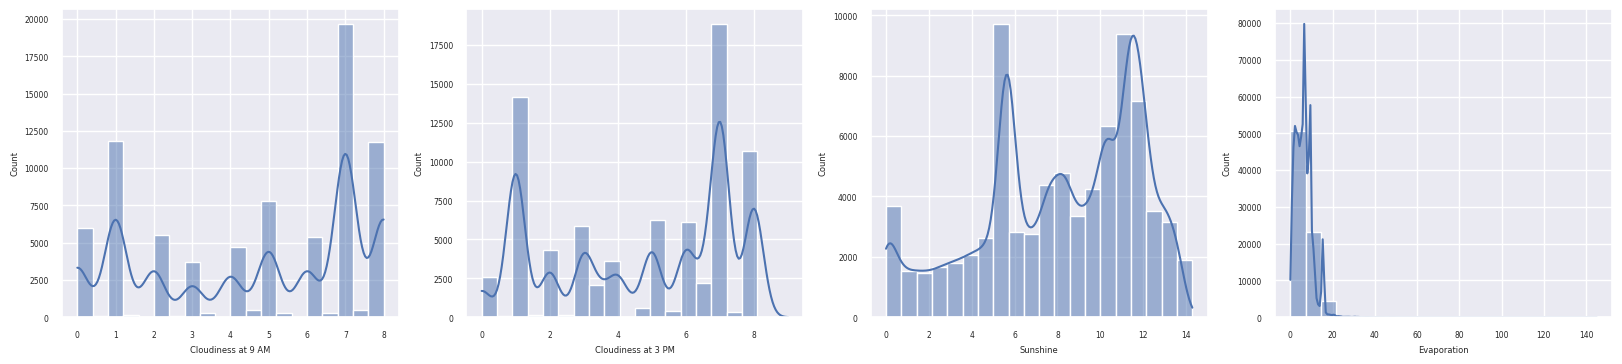

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_train["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_train["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_train["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_train["Evaporation"], bins=20, kde=True,ax=axes[3])

In [ ]:
df_train[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum()

Cloudiness at 9 AM    0
Cloudiness at 3 PM    0
Sunshine              0
Evaporation           0
dtype: int64

In [ ]:
df_train.isnull().sum().sum()

0

In [ ]:
df_train = df_train.reset_index()

In [ ]:
print("null data percentage")
for c in list(df):
  print(c,': ',round((df_train[c].isnull().sum()/len(df))*100,2),'%')

null data percentage
Weather Station :  0.0 %
Minimum Temperature :  0.0 %
Maximum Temperature :  0.0 %
Rainfall :  0.0 %
Evaporation :  0.0 %
Sunshine :  0.0 %
Gust Trajectory :  0.0 %
Air Velocity :  0.0 %
Gust Trajectory at  9 AM :  0.0 %
Gust Trajectory at  3 PM :  0.0 %
Air Velocity at  9 AM :  0.0 %
Air Velocity at  3 PM :  0.0 %
Moisture Level at 9 AM :  0.0 %
Moisture Level at 3 PM :  0.0 %
Atmospheric Pressure at 9 AM :  0.0 %
Atmospheric Pressure at 3 PM :  0.0 %
Cloudiness at 9 AM :  0.0 %
Cloudiness at 3 PM :  0.0 %
Recorded Temperature at 9 AM :  0.0 %
Recorded Temperature at 3 PM :  0.0 %
Rain that day :  0.0 %
Rain the day after :  0.0 %
datetime :  0.0 %
day :  0.0 %
month :  0.0 %
Year :  0.0 %


## Test Preprocess

In [ ]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,datetime,day,month,Year,Rain the day after
90162,Station 8,23.3,30.4,6.0,NaN,NaN,SE,35.0,SSE,SE,...,4.0,NaN,26.3,29.6,Yes,2017-04-09,9,4,2017,No
1559,Station 2,5.8,15.0,0.4,NaN,NaN,N,22.0,SE,N,...,NaN,8.0,8.5,14.8,No,2013-06-06,6,6,2013,Yes
1782,Station 2,21.0,41.8,0.0,NaN,NaN,SSE,28.0,SSE,SSW,...,NaN,NaN,28.7,40.6,No,2014-01-15,15,1,2014,No
38560,Station 42,9.5,29.8,0.0,8.4,12.6,E,39.0,ENE,NE,...,2.0,1.0,16.4,28.7,No,2014-10-22,22,10,2014,No
61888,Station 35,20.1,30.1,2.6,5.8,1.1,W,52.0,NE,NNE,...,7.0,8.0,24.9,28.0,Yes,2010-12-08,8,12,2010,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32887,Station 37,16.5,23.0,0.0,4.8,10.5,SSE,33.0,NNW,ENE,...,1.0,1.0,21.3,21.1,No,2015-10-02,2,10,2015,No
39217,Station 42,5.2,17.1,0.0,1.4,NaN,N,43.0,E,NNE,...,5.0,8.0,8.8,15.8,No,2016-08-09,9,8,2016,Yes
24629,Station 30,14.3,26.5,0.0,NaN,NaN,E,24.0,E,ESE,...,NaN,NaN,20.5,25.5,No,2010-04-17,17,4,2010,No
51077,Station 40,6.7,15.6,7.6,NaN,NaN,SSE,54.0,S,S,...,NaN,NaN,8.5,13.9,Yes,2014-10-15,15,10,2014,No


In [ ]:
for c in list(df_test):
  print(c,': ',round((df_test[c].isnull().sum()/len(df_test))*100,2),'%')

Weather Station :  0.0 %
Minimum Temperature :  0.9 %
Maximum Temperature :  0.85 %
Rainfall :  2.26 %
Evaporation :  43.52 %
Sunshine :  48.17 %
Gust Trajectory :  7.27 %
Air Velocity :  7.24 %
Gust Trajectory at  9 AM :  7.17 %
Gust Trajectory at  3 PM :  3.09 %
Air Velocity at  9 AM :  1.19 %
Air Velocity at  3 PM :  2.31 %
Moisture Level at 9 AM :  1.76 %
Moisture Level at 3 PM :  3.35 %
Atmospheric Pressure at 9 AM :  10.28 %
Atmospheric Pressure at 3 PM :  10.28 %
Cloudiness at 9 AM :  38.37 %
Cloudiness at 3 PM :  40.51 %
Recorded Temperature at 9 AM :  1.11 %
Recorded Temperature at 3 PM :  2.69 %
Rain that day :  0.0 %
datetime :  0.0 %
day :  0.0 %
month :  0.0 %
Year :  0.0 %
Rain the day after :  0.0 %


In [ ]:
df_test = df_test.set_index(['Weather Station','day','month'])

In [ ]:
df_test[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum()

Minimum Temperature             177
Maximum Temperature             166
Recorded Temperature at 9 AM    218
Recorded Temperature at 3 PM    528
dtype: int64

<Axes: xlabel='Recorded Temperature at 3 PM', ylabel='Count'>

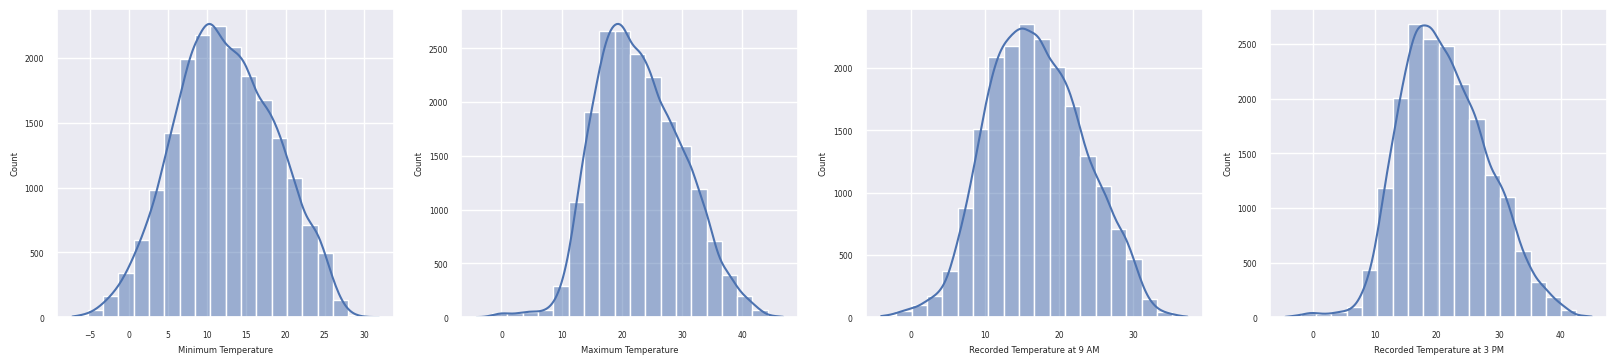

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

In [ ]:
df_test.update(pd.DataFrame(min_temp_mean,columns=["Minimum Temperature"]),overwrite=False)
df_test.update(pd.DataFrame(max_temp_mean,columns=["Maximum Temperature"]),overwrite=False)
df_test.update(pd.DataFrame(recorded_temp_at_9_am,columns=["Recorded Temperature at 9 AM"]),overwrite=False)
df_test.update(pd.DataFrame(recorded_temp_at_3_pm,columns=["Recorded Temperature at 3 PM"]),overwrite=False)

<Axes: xlabel='Recorded Temperature at 3 PM', ylabel='Count'>

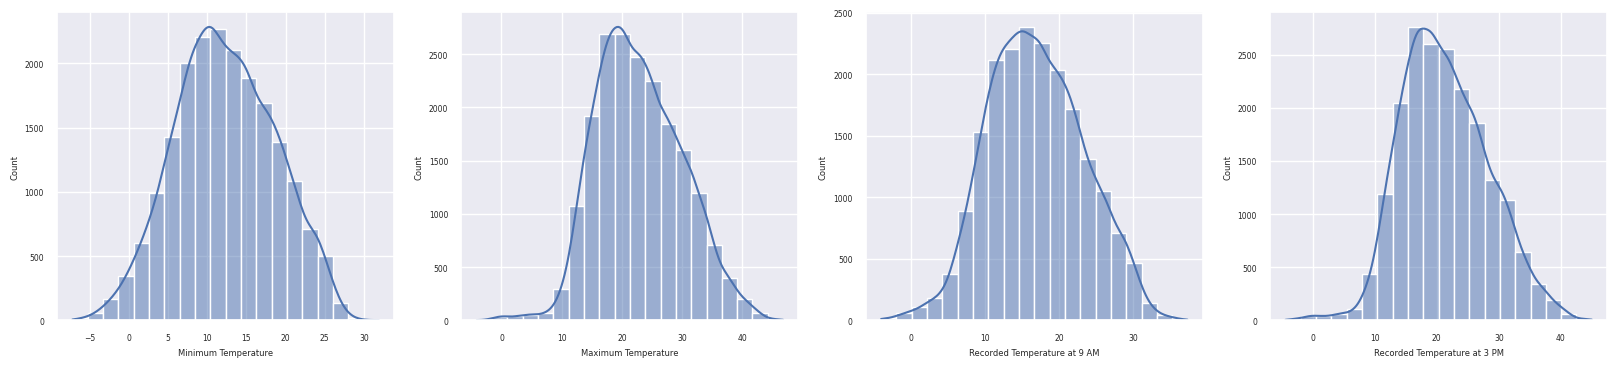

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test["Minimum Temperature"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test["Maximum Temperature"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test["Recorded Temperature at 9 AM"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test["Recorded Temperature at 3 PM"], bins=20, kde=True,ax=axes[3])

In [ ]:
df_test[['Minimum Temperature','Maximum Temperature','Recorded Temperature at 9 AM','Recorded Temperature at 3 PM']].isnull().sum()

Minimum Temperature              0
Maximum Temperature              0
Recorded Temperature at 9 AM     1
Recorded Temperature at 3 PM    23
dtype: int64

In [ ]:
df_test[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum()

Moisture Level at 9 AM    344
Moisture Level at 3 PM    656
dtype: int64

In [ ]:
# Moisture Level at 3pm
df_test.update(pd.DataFrame(moisture_level_train_filler_9am,columns=["Moisture Level at 9 AM"]),overwrite=False)
# Moisture Level at 9am
df_test.update(pd.DataFrame(moisture_level_train_filler_3pm,columns=["Moisture Level at 3 PM"]),overwrite=False)

In [ ]:
df_test[['Moisture Level at 9 AM','Moisture Level at 3 PM']].isnull().sum()

Moisture Level at 9 AM     1
Moisture Level at 3 PM    11
dtype: int64

<Axes: xlabel='Rainfall', ylabel='Count'>

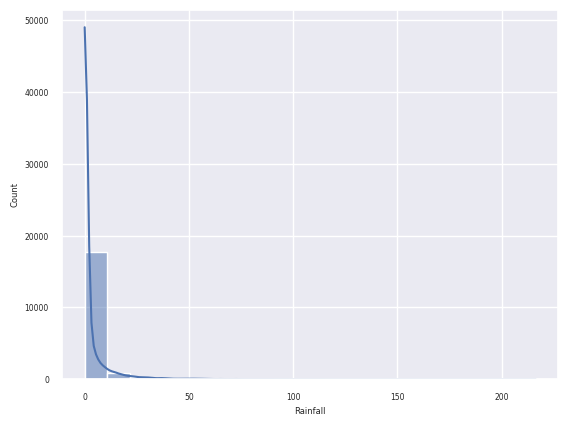

In [ ]:
sns.histplot(df_test["Rainfall"], bins=20, kde=True)

In [ ]:
df_test["Rainfall"] = rainfall_imputer.transform(df_test[["Rainfall"]])

<Axes: xlabel='Rainfall', ylabel='Count'>

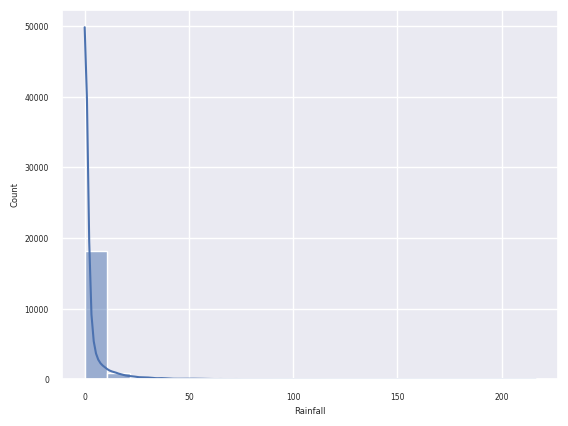

In [ ]:
sns.histplot(df_test["Rainfall"], bins=20, kde=True)

In [ ]:
df_test["Rainfall"].isnull().sum()

0

<Axes: xlabel='Air Velocity at  3 PM', ylabel='Count'>

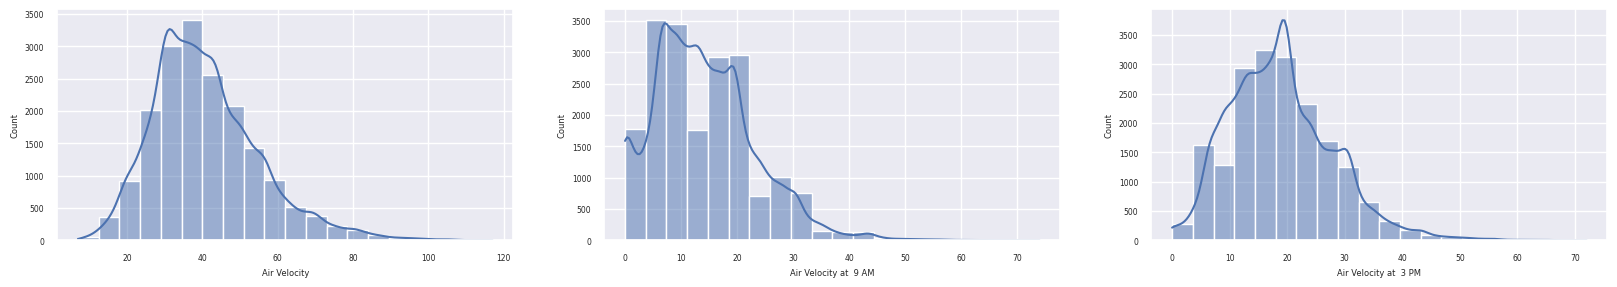

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

In [ ]:
# Air Velocity
df_test.update(air_velocity_filler,overwrite=False)
# Air Velocity at 3pm
df_test.update(air_velocity_filler_3pm,overwrite=False)
# Air Velocity at 9am
df_test.update(air_velocity_filler_9am,overwrite=False)

<Axes: xlabel='Air Velocity at  3 PM', ylabel='Count'>

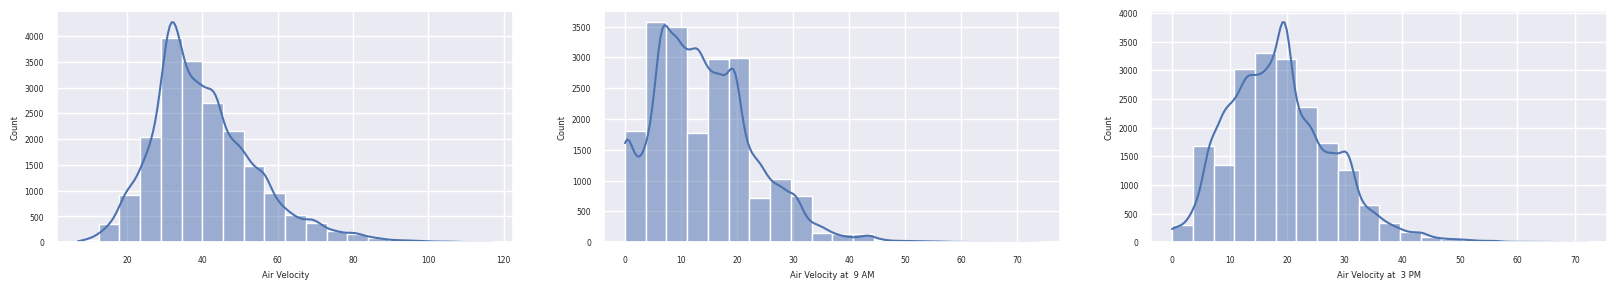

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))
sns.histplot(df_test["Air Velocity"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test["Air Velocity at  9 AM"], bins=20, kde=True, ax = axes[1])
sns.histplot(df_test["Air Velocity at  3 PM"], bins=20, kde=True, ax = axes[2])

In [ ]:
df_test[['Air Velocity at  9 AM', 'Air Velocity at  3 PM', 'Air Velocity']].isnull().sum()

Air Velocity at  9 AM    0
Air Velocity at  3 PM    0
Air Velocity             1
dtype: int64

<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

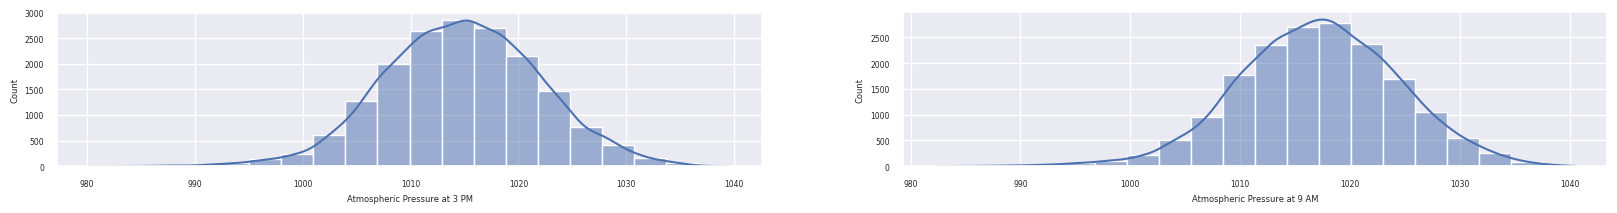

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

In [ ]:
# Atmospheric Pressure at 3pm
df_test.update(atmospheric_pressure_filler_3pm,overwrite=False)
# Atmospheric Pressure at 9am
df_test.update(atmospheric_pressure_filler_9am,overwrite=False)

<Axes: xlabel='Atmospheric Pressure at 9 AM', ylabel='Count'>

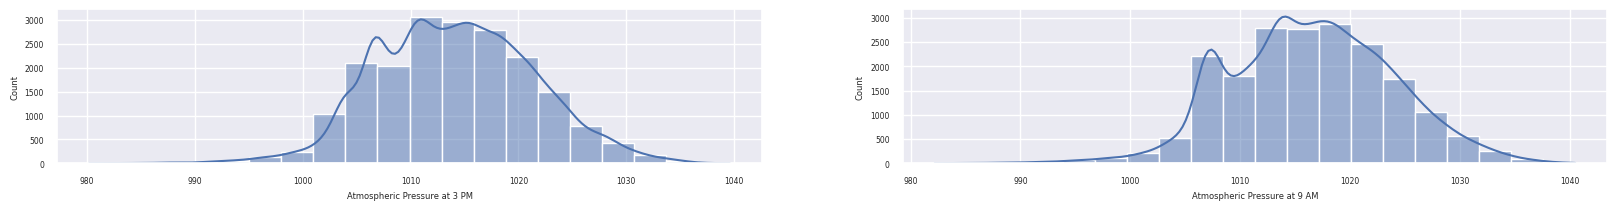

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))
sns.histplot(df_test["Atmospheric Pressure at 3 PM"], bins=20, kde=True, ax = axes[0])
sns.histplot(df_test["Atmospheric Pressure at 9 AM"], bins=20, kde=True, ax = axes[1])

In [ ]:
df_test[['Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM']].isnull().sum()

Atmospheric Pressure at 9 AM    8
Atmospheric Pressure at 3 PM    9
dtype: int64

In [ ]:
gust_trajectory_filler = df_test['Gust Trajectory'].fillna(df_train['Gust Trajectory'].mode()[0])
df_test.update(gust_trajectory_filler,overwrite=False)
gust_trajectory_at_3pm_filler = df_test['Gust Trajectory at  3 PM'].fillna(df_train['Gust Trajectory at  3 PM'].mode()[0])
df_test.update(gust_trajectory_at_3pm_filler,overwrite=False)
gust_trajectory_at_9am_filler = df_test['Gust Trajectory at  9 AM'].fillna(df_train['Gust Trajectory at  9 AM'].mode()[0])
df_test.update(gust_trajectory_at_9am_filler,overwrite=False)

In [ ]:
df_test[['Gust Trajectory','Gust Trajectory at  9 AM','Gust Trajectory at  3 PM']].isnull().sum()

Gust Trajectory             0
Gust Trajectory at  9 AM    0
Gust Trajectory at  3 PM    0
dtype: int64

<Axes: xlabel='Evaporation', ylabel='Count'>

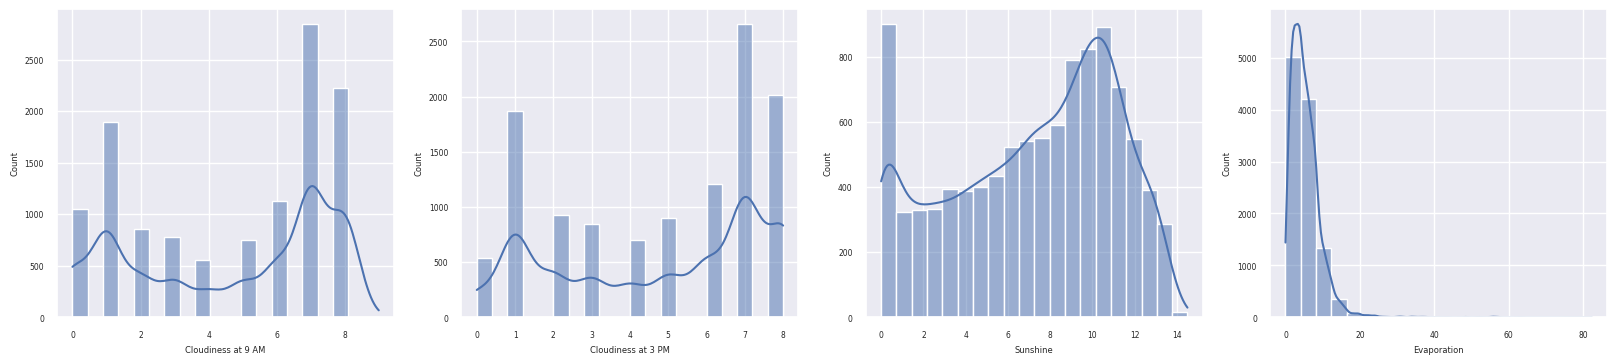

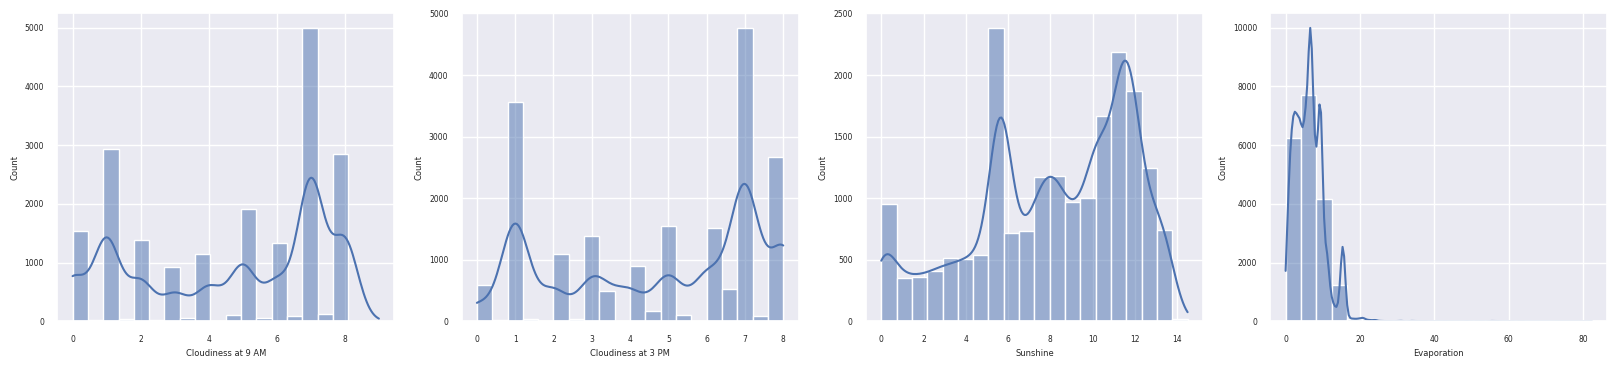

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test["Evaporation"], bins=20, kde=True,ax=axes[3])

#df_test["Cloudiness at 9 AM"] = cloudiness_at_9_am_imputer.transform(df_test[["Cloudiness at 9 AM"]])
#df_test["Cloudiness at 3 PM"] = cloudiness_at_3_pm_imputer.transform(df_test[["Cloudiness at 3 PM"]])
#df_test["Sunshine"] = sunshine_imputer.transform(df_test[["Sunshine"]])
#df_test["Evaporation"] = evaporation_imputer.transform(df_test[["Evaporation"]])
df_test.update(cloudiness_at_9_am_mean,overwrite=False)
df_test.update(cloudiness_at_3_pm_mean,overwrite=False)
df_test.update(sunshine_mean,overwrite=False)
df_test.update(evaporation_mean,overwrite=False)

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.histplot(df_test["Cloudiness at 9 AM"], bins=20, kde=True,ax=axes[0])
sns.histplot(df_test["Cloudiness at 3 PM"], bins=20, kde=True,ax=axes[1])
sns.histplot(df_test["Sunshine"], bins=20, kde=True,ax=axes[2])
sns.histplot(df_test["Evaporation"], bins=20, kde=True,ax=axes[3])

In [ ]:
df_test[['Cloudiness at 9 AM','Cloudiness at 3 PM','Sunshine', 'Evaporation']].isnull().sum()

Cloudiness at 9 AM    68
Cloudiness at 3 PM    75
Sunshine              89
Evaporation           74
dtype: int64

In [ ]:
df_test.isnull().sum().sum()

360

In [ ]:
for c in list(df_test):
  print(c,': ',round((df_test[c].isnull().sum()/len(df_test))*100,2),'%')

Minimum Temperature :  0.0 %
Maximum Temperature :  0.0 %
Rainfall :  0.0 %
Evaporation :  0.38 %
Sunshine :  0.45 %
Gust Trajectory :  0.0 %
Air Velocity :  0.01 %
Gust Trajectory at  9 AM :  0.0 %
Gust Trajectory at  3 PM :  0.0 %
Air Velocity at  9 AM :  0.0 %
Air Velocity at  3 PM :  0.0 %
Moisture Level at 9 AM :  0.01 %
Moisture Level at 3 PM :  0.06 %
Atmospheric Pressure at 9 AM :  0.04 %
Atmospheric Pressure at 3 PM :  0.05 %
Cloudiness at 9 AM :  0.35 %
Cloudiness at 3 PM :  0.38 %
Recorded Temperature at 9 AM :  0.01 %
Recorded Temperature at 3 PM :  0.12 %
Rain that day :  0.0 %
datetime :  0.0 %
Year :  0.0 %
Rain the day after :  0.0 %


In [ ]:
df_test = df_test.dropna()

In [ ]:
df_test.isnull().sum().sum()

0

In [ ]:
df_test = df_test.reset_index()

### Encodings

### Train Encoding

In [ ]:
label_encoder = LabelEncoder()

## to plot heat map we should declare numerical_df
numerical_df_train = df_train.drop(['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'datetime'], axis=1)

numerical_df_train['Rain that day'] =  label_encoder.fit_transform(numerical_df_train['Rain that day'])
numerical_df_train["Rain the day after"] = label_encoder.fit_transform(numerical_df_train["Rain the day after"])


#data_to_encode = df_train[["Weather Station", "Gust Trajectory", "Gust Trajectory at  9 AM", "Gust Trajectory at  3 PM"]]
#encoder = OneHotEncoder(dtype='int')
#encoded_data = encoder.fit_transform(data_to_encode)
#encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Weather Station", "Gust Trajectory", "Gust Trajectory at  9 AM", "Gust Trajectory at  3 PM"]))
#df_train = pd.concat([df_train.drop(['Weather Station', 'Gust Trajectory', 'Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'datetime'], axis=1), encoded_df], axis=1)

df_train["Weather Station"] = label_encoder.fit_transform(df_train["Weather Station"])
df_train["Gust Trajectory"] = label_encoder.fit_transform(df_train["Gust Trajectory"])
df_train["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_train["Gust Trajectory at  9 AM"])
df_train["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_train["Gust Trajectory at  3 PM"])
df_train['Rain that day'] =  label_encoder.fit_transform(df_train['Rain that day'])
df_train["Rain the day after"] = label_encoder.fit_transform(df_train["Rain the day after"])
df_train = df_train.drop("datetime", axis=1)


### Test Encoding

In [ ]:
df_test["Weather Station"] = label_encoder.fit_transform(df_test["Weather Station"])
df_test["Gust Trajectory"] = label_encoder.fit_transform(df_test["Gust Trajectory"])
df_test["Gust Trajectory at  9 AM"] = label_encoder.fit_transform(df_test["Gust Trajectory at  9 AM"])
df_test["Gust Trajectory at  3 PM"] = label_encoder.fit_transform(df_test["Gust Trajectory at  3 PM"])
df_test['Rain that day'] =  label_encoder.fit_transform(df_test['Rain that day'])
df_test["Rain the day after"] = label_encoder.fit_transform(df_test["Rain the day after"])
df_test = df_test.drop("datetime", axis=1)

df_test

,Weather Station,day,month,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Year,Rain the day after
0,47,9,4,23.3,30.4,6.0,5.0,6.600000,9,35.0,...,65.0,1013.8,1009.0,4.0,5.0,26.3,29.6,1,2017,0
1,12,6,6,5.8,15.0,0.4,8.6,11.800000,3,22.0,...,65.0,1021.9,1019.6,8.0,8.0,8.5,14.8,0,2013,1
2,12,15,1,21.0,41.8,0.0,8.6,11.800000,10,28.0,...,15.0,1019.4,1015.1,1.0,7.5,28.7,40.6,0,2014,0
3,37,22,10,9.5,29.8,0.0,8.4,12.600000,0,39.0,...,30.0,1024.3,1018.6,2.0,1.0,16.4,28.7,0,2014,0
4,29,8,12,20.1,30.1,2.6,5.8,1.100000,13,52.0,...,56.0,1005.2,1002.7,7.0,8.0,24.9,28.0,1,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19483,31,2,10,16.5,23.0,0.0,4.8,10.500000,10,33.0,...,57.0,1033.4,1031.8,1.0,1.0,21.3,21.1,0,2015,0
19484,37,9,8,5.2,17.1,0.0,1.4,6.600000,3,43.0,...,64.0,1022.2,1017.1,5.0,8.0,8.8,15.8,0,2016,1
19485,24,17,4,14.3,26.5,0.0,15.2,7.633333,0,24.0,...,51.0,1006.5,1003.9,5.0,7.0,20.5,25.5,0,2010,0
19486,35,15,10,6.7,15.6,7.6,9.6,5.660000,10,54.0,...,41.0,1015.7,1014.1,7.0,7.0,8.5,13.9,1,2014,0


## EDA

### Heat Map

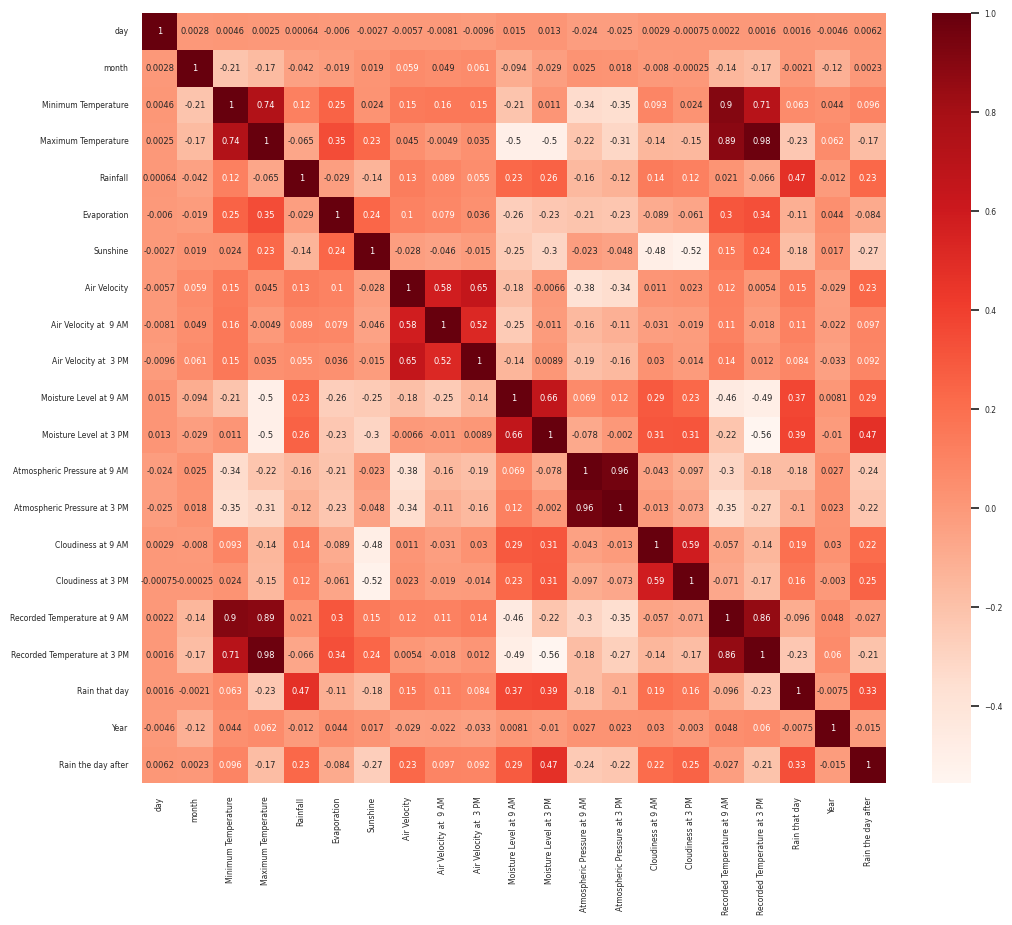

In [ ]:
#Using Pearson Correlation
sns.set(font_scale=0.5)
plt.figure(figsize=(12,10))
cor = numerical_df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<ipython-input-1279-5ac8cd94859a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rain the day after", y="Moisture Level at 3 PM", data=df_train, palette=colors ,ax=axes[0])
<ipython-input-1279-5ac8cd94859a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rain the day after", y="Cloudiness at 3 PM", data=df_train, palette=colors ,ax=axes[1])
<ipython-input-1279-5ac8cd94859a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rain the day after", y="Cloudiness at 9 AM", data=df_train, palette=colors ,ax=axes[2])
<ipython-input-1279-5

<Axes: xlabel='Rain the day after', ylabel='Moisture Level at 9 AM'>

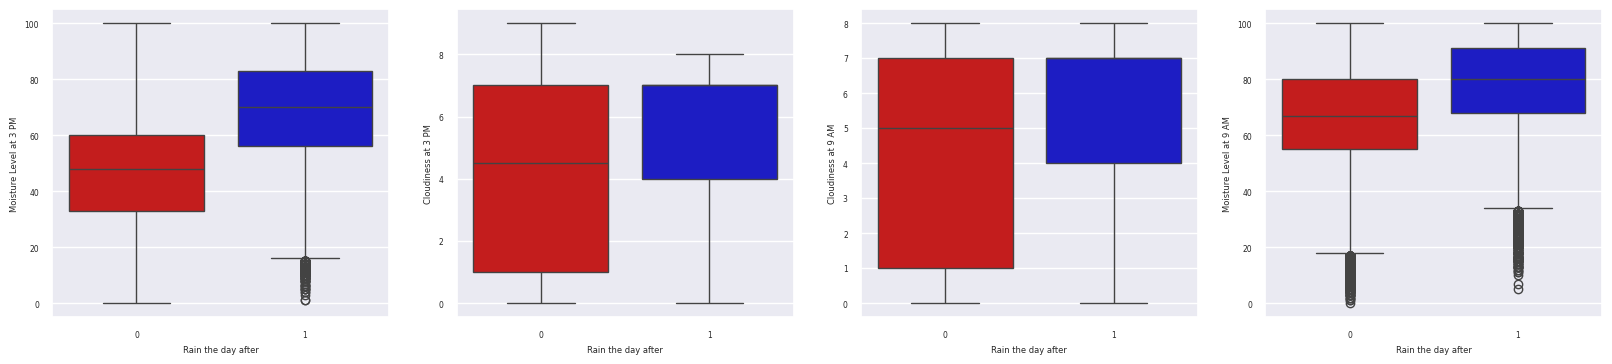

In [ ]:
colors = ["#DF0101", "#0101DF"]
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Rain the day after", y="Moisture Level at 3 PM", data=df_train, palette=colors ,ax=axes[0])
sns.boxplot(x="Rain the day after", y="Cloudiness at 3 PM", data=df_train, palette=colors ,ax=axes[1])
sns.boxplot(x="Rain the day after", y="Cloudiness at 9 AM", data=df_train, palette=colors ,ax=axes[2])
sns.boxplot(x="Rain the day after", y="Moisture Level at 9 AM", data=df_train, palette=colors ,ax=axes[3])


### Negative Correlations

<ipython-input-1280-97ed52a0eae6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rain the day after", y="Sunshine", data=df_train, palette=colors ,ax=axes[0])
<ipython-input-1280-97ed52a0eae6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rain the day after", y="Atmospheric Pressure at 3 PM", data=df_train, palette=colors ,ax=axes[1])
<ipython-input-1280-97ed52a0eae6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rain the day after", y="Atmospheric Pressure at 9 AM", data=df_train, palette=colors ,ax=axes[2])
<ipython-input-

<Axes: xlabel='Rain the day after', ylabel='Recorded Temperature at 3 PM'>

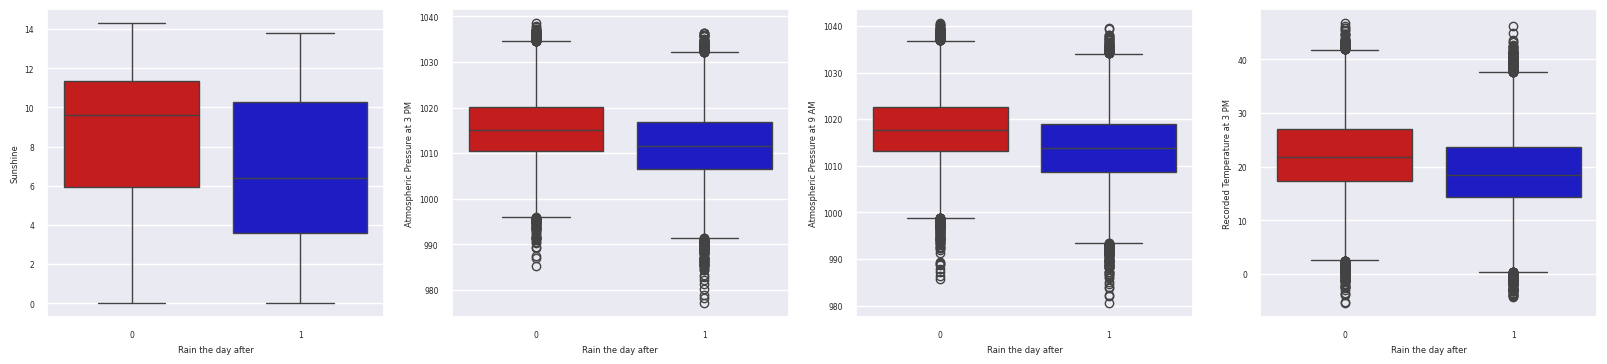

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Rain the day after", y="Sunshine", data=df_train, palette=colors ,ax=axes[0])
sns.boxplot(x="Rain the day after", y="Atmospheric Pressure at 3 PM", data=df_train, palette=colors ,ax=axes[1])
sns.boxplot(x="Rain the day after", y="Atmospheric Pressure at 9 AM", data=df_train, palette=colors ,ax=axes[2])
sns.boxplot(x="Rain the day after", y="Recorded Temperature at 3 PM", data=df_train, palette=colors ,ax=axes[3])

### Outliers and Noises Removal

In [ ]:
columns_to_check = [
    'Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation',
    'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM', 'Air Velocity at  3 PM',
    'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
    'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM',
    'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM'
]
for column in columns_to_check:
  Q1 = df_train[column].quantile(0.1)
  Q3 = df_train[column].quantile(0.9)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_train = df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]
df_train

,Weather Station,day,month,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Year,Rain the day after
0,48,1,11,8.0,24.30,0.0,3.4,6.300000,7,30.0,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,0,2007,1
1,48,2,11,14.0,26.90,3.6,4.4,9.700000,1,39.0,...,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1,2007,1
2,48,3,11,13.7,23.40,3.6,5.8,3.300000,7,85.0,...,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1,2007,1
4,48,5,11,7.6,16.10,2.8,5.6,10.600000,10,50.0,...,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,1,2007,0
5,48,7,11,6.1,18.20,0.2,4.2,8.400000,9,43.0,...,47.0,1024.6,1022.2,4.0,6.0,12.4,17.3,0,2007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78397,10,25,6,8.6,14.30,0.0,2.8,3.800000,7,35.0,...,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0,2017,1
78398,15,25,6,6.4,14.25,0.6,1.0,3.550000,13,55.5,...,84.0,1016.9,1016.2,8.0,8.0,8.6,12.2,0,2017,0
78399,7,25,6,5.7,12.60,0.0,2.2,4.266667,7,50.0,...,67.0,1003.8,1002.2,7.0,3.0,6.4,9.9,0,2017,0
78400,46,25,6,11.0,24.20,0.0,2.2,9.800000,1,20.0,...,53.0,1020.5,1017.3,6.0,3.0,15.9,22.6,0,2017,0


In [ ]:
#continuous_columns = [
 #   'Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation',
  #  'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM', 'Air Velocity at  3 PM',
  #  'Moisture Level at 9 AM', 'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
  #  'Atmospheric Pressure at 3 PM', 'Cloudiness at 9 AM', 'Cloudiness at 3 PM',
  #  'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM'
#]
#for column in continuous_columns:
#  df_train[column] = df_train[column].rolling(window=7, min_periods=1).mean()
#df_train

### Training the Models

In [ ]:
X_train = df_train.drop("Rain the day after", axis=1)
y_train = df_train['Rain the day after']
X_train

,Weather Station,day,month,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Year
0,48,1,11,8.0,24.30,0.0,3.4,6.300000,7,30.0,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,0,2007
1,48,2,11,14.0,26.90,3.6,4.4,9.700000,1,39.0,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1,2007
2,48,3,11,13.7,23.40,3.6,5.8,3.300000,7,85.0,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1,2007
4,48,5,11,7.6,16.10,2.8,5.6,10.600000,10,50.0,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,1,2007
5,48,7,11,6.1,18.20,0.2,4.2,8.400000,9,43.0,...,63.0,47.0,1024.6,1022.2,4.0,6.0,12.4,17.3,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78397,10,25,6,8.6,14.30,0.0,2.8,3.800000,7,35.0,...,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0,2017
78398,15,25,6,6.4,14.25,0.6,1.0,3.550000,13,55.5,...,91.0,84.0,1016.9,1016.2,8.0,8.0,8.6,12.2,0,2017
78399,7,25,6,5.7,12.60,0.0,2.2,4.266667,7,50.0,...,75.0,67.0,1003.8,1002.2,7.0,3.0,6.4,9.9,0,2017
78400,46,25,6,11.0,24.20,0.0,2.2,9.800000,1,20.0,...,68.0,53.0,1020.5,1017.3,6.0,3.0,15.9,22.6,0,2017


In [ ]:
# fit and transform the data
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(X_train)

# create a new DataFrame with the scaled data
X_train = pd.DataFrame(scaled_data, columns=X_train.columns)
X_train

,Weather Station,day,month,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Year
0,0.96,-1.000000,1.0,-0.423913,0.194175,0.0,-0.576923,-0.398844,-0.222222,-0.529412,...,-0.115385,-0.833333,0.31,0.079208,0.4,0.4,-0.225806,0.295918,0.0,-1.5
1,0.96,-0.933333,1.0,0.228261,0.446602,3.6,-0.384615,0.190751,-0.888889,0.000000,...,0.346154,-0.600000,-0.42,-0.574257,0.0,-0.4,0.107527,0.510204,1.0,-1.5
2,0.96,-0.866667,1.0,0.195652,0.106796,3.6,-0.115385,-0.919075,-0.222222,2.705882,...,0.423077,0.500000,-0.71,-0.693069,0.6,0.4,-0.118280,-0.051020,1.0,-1.5
3,0.96,-0.733333,1.0,-0.467391,-0.601942,2.8,-0.153846,0.346821,0.111111,0.647059,...,-0.115385,-0.166667,0.17,0.425743,0.4,0.4,-0.580645,-0.540816,1.0,-1.5
4,0.96,-0.600000,1.0,-0.630435,-0.398058,0.2,-0.423077,-0.034682,0.000000,0.235294,...,-0.307692,-0.233333,0.80,0.792079,-0.2,0.2,-0.440860,-0.346939,0.0,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75210,-0.56,0.600000,0.0,-0.358696,-0.776699,0.0,-0.692308,-0.832370,-0.222222,-0.235294,...,-0.153846,0.066667,0.08,0.079208,0.4,0.4,-0.774194,-0.744898,0.0,1.0
75211,-0.36,0.600000,0.0,-0.597826,-0.781553,0.6,-1.038462,-0.875723,0.444444,0.970588,...,0.769231,1.000000,0.03,0.198020,0.6,0.6,-0.849462,-0.867347,0.0,1.0
75212,-0.68,0.600000,0.0,-0.673913,-0.941748,0.0,-0.807692,-0.751445,-0.222222,0.647059,...,0.153846,0.433333,-1.28,-1.188119,0.4,-0.4,-1.086022,-1.102041,0.0,1.0
75213,0.88,0.600000,0.0,-0.097826,0.184466,0.0,-0.807692,0.208092,-0.888889,-1.117647,...,-0.115385,-0.033333,0.39,0.306931,0.2,-0.4,-0.064516,0.193878,0.0,1.0


In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=5)
#X_train = pca.fit_transform(X_train)
#X_train = pd.DataFrame(X_train)
#X_train

In [ ]:
classifiers = {
    "KNearest": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": tree.DecisionTreeClassifier(max_depth=8)
}

In [ ]:
params = {
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    "DecisionTreeClassifier": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,15,1)),
              "min_samples_leaf": list(range(5,7,1))},
    "KNearest": {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
}

In [ ]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params)
    grid_classifier.fit(X_train, y_train)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

# Predict and Train

In [ ]:
X_test = df_test.drop("Rain the day after", axis=1)
y_test = df_test['Rain the day after']

In [ ]:
scaled_data = scaler.transform(X_test)

# create a new DataFrame with the scaled data
X_test = pd.DataFrame(scaled_data, columns=X_test.columns)
X_test

,Weather Station,day,month,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Year
0,0.92,-0.466667,-0.4,1.239130,0.786408,6.0,-0.269231,-0.346821,0.000000,-0.235294,...,0.230769,0.366667,-0.28,-0.514851,-0.2,0.0,1.053763,0.908163,1.0,1.00
1,-0.48,-0.666667,0.0,-0.663043,-0.708738,0.4,0.423077,0.554913,-0.666667,-1.000000,...,1.115385,0.366667,0.53,0.534653,0.6,0.6,-0.860215,-0.602041,0.0,0.00
2,-0.48,-0.066667,-1.0,0.989130,1.893204,0.0,0.423077,0.554913,0.111111,-0.647059,...,-0.923077,-1.300000,0.28,0.089109,-0.8,0.5,1.311828,2.030612,0.0,0.25
3,0.52,0.400000,0.8,-0.260870,0.728155,0.0,0.384615,0.693642,-1.000000,0.000000,...,-0.538462,-0.800000,0.77,0.435644,-0.6,-0.8,-0.010753,0.816327,0.0,0.25
4,0.20,-0.533333,1.2,0.891304,0.757282,2.6,-0.115385,-1.300578,0.444444,0.764706,...,0.153846,0.066667,-1.14,-1.138614,0.4,0.6,0.903226,0.744898,1.0,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19483,0.28,-0.933333,0.8,0.500000,0.067961,0.0,-0.307692,0.329480,0.111111,-0.352941,...,-0.538462,0.100000,1.68,1.742574,-0.8,-0.8,0.516129,0.040816,0.0,0.50
19484,0.52,-0.466667,0.4,-0.728261,-0.504854,0.0,-0.961538,-0.346821,-0.666667,0.235294,...,0.230769,0.333333,0.56,0.287129,0.0,0.6,-0.827957,-0.500000,0.0,0.75
19485,0.00,0.066667,-0.4,0.260870,0.407767,0.0,1.692308,-0.167630,-1.000000,-0.882353,...,-0.076923,-0.100000,-1.01,-1.019802,0.0,0.4,0.430108,0.489796,0.0,-0.75
19486,0.44,-0.066667,0.8,-0.565217,-0.650485,7.6,0.615385,-0.509827,0.111111,0.882353,...,-0.500000,-0.433333,-0.09,-0.009901,0.4,0.4,-0.860215,-0.693878,1.0,0.25


### PCA section for Diminsionality Reduction

In [ ]:
#X_test = pca.transform(X_test)
#X_test = pd.DataFrame(X_test)
#X_test

### Train and Predict Section
caution: gridsearchCV and crossvalscore have been used but they are commented

In [ ]:
#Scores after applying Grid Search
print('Cross-Validation Scores after applying GridSearch:-')
for key, classifier in classifiers.items():
    #classifier = gridsearch(classifier,params[key])
    #cv_score = cross_val_score(classifier, X_train, y_train, cv=3)
    #print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))

Cross-Validation Scores after applying GridSearch:-
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     13010
           1       0.70      0.60      0.64      6478

    accuracy                           0.78     19488
   macro avg       0.76      0.73      0.74     19488
weighted avg       0.77      0.78      0.78     19488

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     13010
           1       0.76      0.54      0.64      6478

    accuracy                           0.79     19488
   macro avg       0.78      0.73      0.75     19488
weighted avg       0.79      0.79      0.78     19488

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     13010
           1       0.72      0.59      0.65      6478

    accuracy                           0.79     19488
   macro avg       0.77      0.74      0.75     19488
weighted avg       0.7